### Exercise: 
Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear regression (e.g., split into training and testing sets).

### Import Necessary Libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

The load_boston dataset has been deprecated due to ethical concerns. Instead, we can use the California Housing dataset, which is also included in Scikit-Learn

#### Load the California Housing Dataset

In [10]:
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


### Split the Data into Features and Target Variable

In [11]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

### Split the Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


### Standardize the Features

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Exercise:
Implement linear regression using Scikit-Learn. Fit the model to the training data.

## Import Linear Regression and Train the Model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

#### Make Predictions on the Test Data

In [15]:
y_pred = model.predict(X_test_scaled)

#### Evaluate the Model

In [16]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 0.5558915986952442
R-squared score: 0.575787706032451


## Exercise: 
Predict the target variable for the test set using the fitted linear regression model.


#### Predict the Target Variable for the Test Set

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

### Evaluate the Model

In [18]:
mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 0.5558915986952442
R-squared score: 0.575787706032451


### Exercise:
Calculate the Mean Squared Error (MSE) of the linear regression model on the test set.


In [21]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 0.5558915986952442
R-squared score: 0.575787706032451


### Exercise: 
Calculate the R-squared value of the linear regression model on the test set.


In [22]:
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")

R-squared score: 0.575787706032451


### Exercise: 
Plot the regression line along with the actual data points to visually assess the model's performance.

#### Import Additional Libraries

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Plot the Regression Line

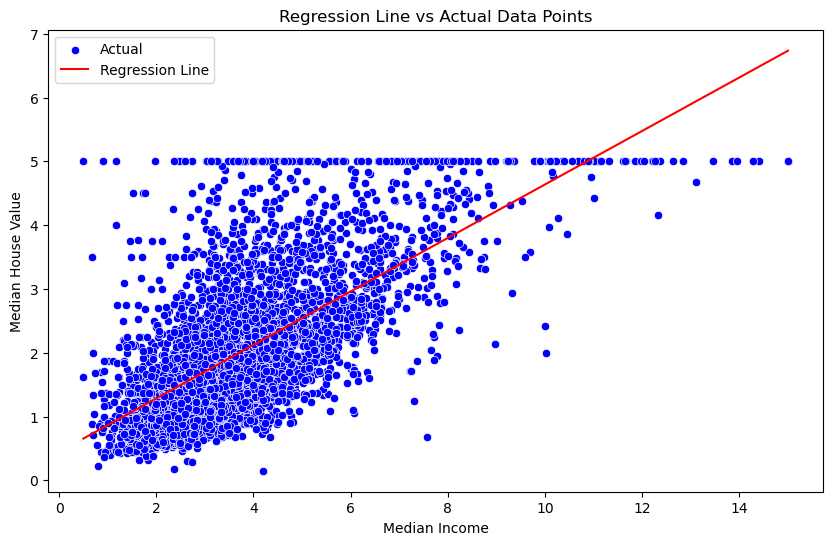

In [26]:
df['MedInc'] = housing.data[:, 0]

X_train_medinc = X_train[['MedInc']]
X_test_medinc = X_test[['MedInc']]
scaler_medinc = StandardScaler()
X_train_medinc_scaled = scaler_medinc.fit_transform(X_train_medinc)
X_test_medinc_scaled = scaler_medinc.transform(X_test_medinc)

model_medinc = LinearRegression()
model_medinc.fit(X_train_medinc_scaled, y_train)

y_pred_medinc = model_medinc.predict(X_test_medinc_scaled)

plot_df = pd.DataFrame({
    'MedInc': X_test['MedInc'],
    'Actual': y_test,
    'Predicted': y_pred_medinc
})


plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='Actual', data=plot_df, label='Actual', color='blue')
sns.lineplot(x='MedInc', y='Predicted', data=plot_df, label='Regression Line', color='red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Regression Line vs Actual Data Points')
plt.legend()
plt.show()

### Exercise: 
Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.

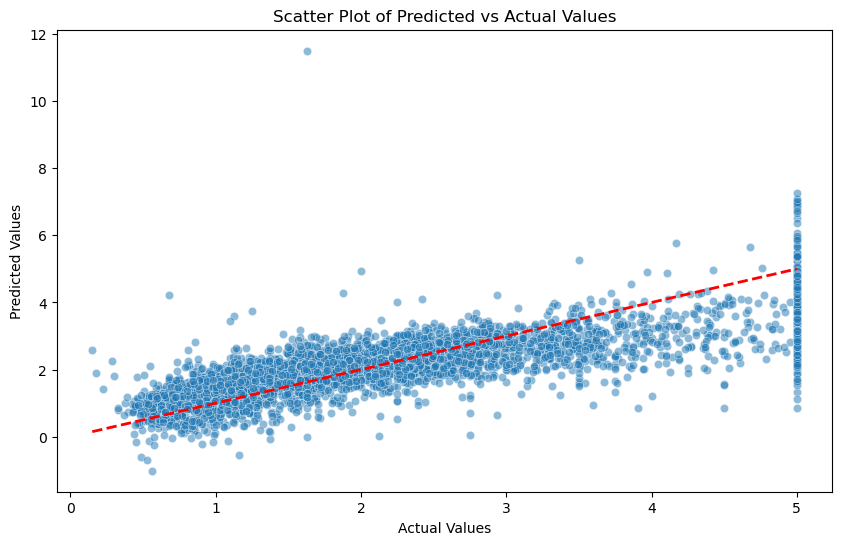

In [27]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

### Exercise:
Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [28]:
# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 0.5558915986952442
R-squared score: 0.575787706032451


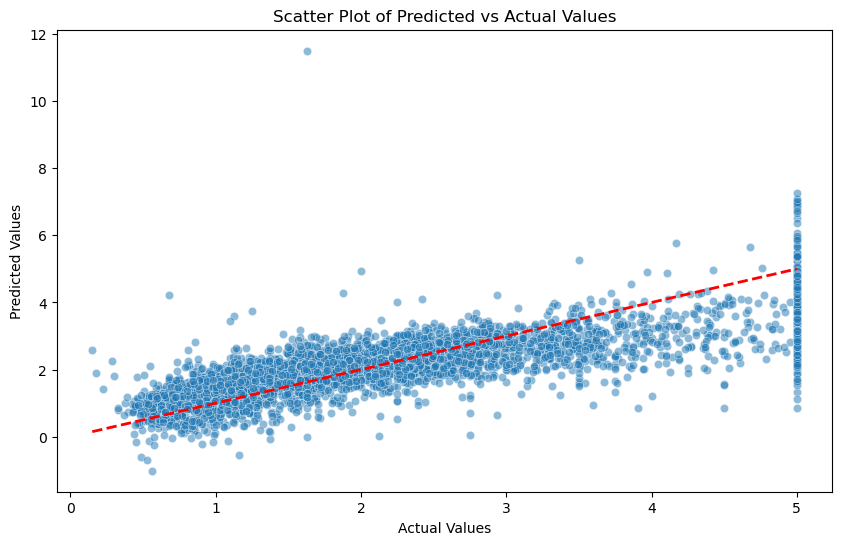

In [29]:

# Create a DataFrame for plotting predicted vs actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot: Predicted vs Actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()



Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929


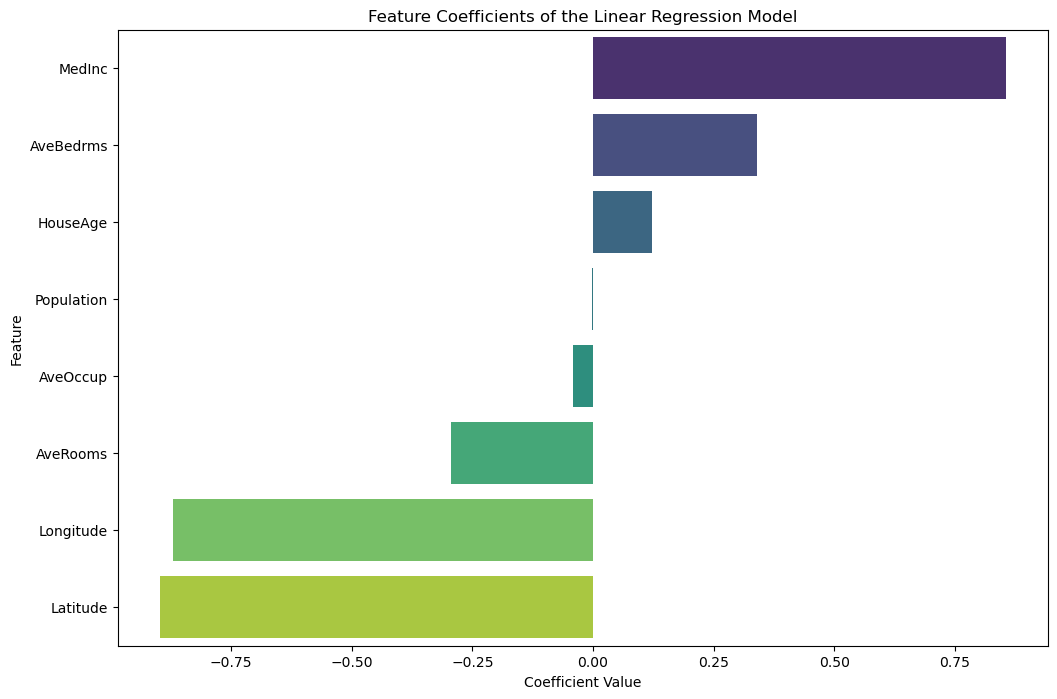

In [30]:
# Interpret the coefficients
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coef_df)

# Optionally: Visualize coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Coefficients of the Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()